In [1]:
import quandl
import datetime
import json
import os
from dotenv import load_dotenv
import seaborn as sns
import pandas as pd
import os
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np
import yfinance as yf
import hvplot.pandas


Bad key "text.kerning_factor" on line 4 in
C:\Users\ASUS\Desktop\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
tickers = ['SPY', 'IWM', 'VWO', 'BIZD', 'USRT', 'GLD', 'BLOK', 'VGLT', 'STIP', 'UUP', 'DBO', 'SHY']

In [3]:
port_df = pd.DataFrame()
port_df = yf.download(tickers, start="2005-01-01", end="2020-01-30")
port_df.head()

[*********************100%***********************]  12 of 12 completed


Adj Close                                                       \
                BIZD BLOK DBO        GLD        IWM        SHY        SPY   
Date                                                                        
2005-01-03       NaN  NaN NaN  43.020000  51.691811  62.239574  88.145691   
2005-01-04       NaN  NaN NaN  42.740002  50.583706  62.101971  87.068596   
2005-01-05       NaN  NaN NaN  42.669998  49.572681  62.117252  86.467743   
2005-01-06       NaN  NaN NaN  42.150002  49.835545  62.147865  86.907394   
2005-01-07       NaN  NaN NaN  41.840000  49.281513  62.155495  86.782814   

                          ... Volume                                       \
           STIP USRT UUP  ...    DBO      GLD       IWM     SHY       SPY   
Date                      ...                                               
2005-01-03  NaN  NaN NaN  ...    NaN  4750400  16062600  370200  55748000   
2005-01-04  NaN  NaN NaN  ...    NaN  3456800  27450000  425300  69167600   
2005-01-05  NaN  NaN NaN  ...    NaN  2033600  29884200  273500  65667300   
2005-01-06  NaN  NaN NaN  ...    NaN  2556400  23061200  318800  47814700   
2005-01-07  NaN  NaN NaN  ...    NaN  4492700  20906200  142500  55847700   

                                   
           STIP USRT UUP VGLT VWO  
Date                               
2005-01-03  NaN  NaN NaN  NaN NaN  
2005-01-04  NaN  NaN NaN  NaN NaN  
2005-01-05  NaN  NaN NaN  NaN NaN  
2005-01-06  NaN  NaN NaN  NaN NaN  
2005-01-07  NaN  NaN NaN  NaN NaN  

[5 rows x 72 columns]

In [4]:
# Reshape Volume and Returns
volume = port_df[["Volume", "Adj Close"]]
volume.head()

Volume                                                              \
             BIZD BLOK DBO      GLD       IWM     SHY       SPY STIP USRT UUP   
Date                                                                            
2005-01-03    NaN  NaN NaN  4750400  16062600  370200  55748000  NaN  NaN NaN   
2005-01-04    NaN  NaN NaN  3456800  27450000  425300  69167600  NaN  NaN NaN   
2005-01-05    NaN  NaN NaN  2033600  29884200  273500  65667300  NaN  NaN NaN   
2005-01-06    NaN  NaN NaN  2556400  23061200  318800  47814700  NaN  NaN NaN   
2005-01-07    NaN  NaN NaN  4492700  20906200  142500  55847700  NaN  NaN NaN   

            ... Adj Close                                                   \
            ...       DBO        GLD        IWM        SHY        SPY STIP   
Date        ...                                                              
2005-01-03  ...       NaN  43.020000  51.691811  62.239574  88.145691  NaN   
2005-01-04  ...       NaN  42.740002  50.583706  62.101971  87.068596  NaN   
2005-01-05  ...       NaN  42.669998  49.572681  62.117252  86.467743  NaN   
2005-01-06  ...       NaN  42.150002  49.835545  62.147865  86.907394  NaN   
2005-01-07  ...       NaN  41.840000  49.281513  62.155495  86.782814  NaN   

                              
           USRT UUP VGLT VWO  
Date                          
2005-01-03  NaN NaN  NaN NaN  
2005-01-04  NaN NaN  NaN NaN  
2005-01-05  NaN NaN  NaN NaN  
2005-01-06  NaN NaN  NaN NaN  
2005-01-07  NaN NaN  NaN NaN  

[5 rows x 24 columns]

In [30]:
#Master DF with all tickers and volume and returns

dropped_level = volume.droplevel(axis=1, level=0)
dropped_level.head()

BIZD  BLOK  DBO      GLD       IWM     SHY       SPY  STIP  USRT  \
Date                                                                           
2005-01-03   NaN   NaN  NaN  4750400  16062600  370200  55748000   NaN   NaN   
2005-01-04   NaN   NaN  NaN  3456800  27450000  425300  69167600   NaN   NaN   
2005-01-05   NaN   NaN  NaN  2033600  29884200  273500  65667300   NaN   NaN   
2005-01-06   NaN   NaN  NaN  2556400  23061200  318800  47814700   NaN   NaN   
2005-01-07   NaN   NaN  NaN  4492700  20906200  142500  55847700   NaN   NaN   

            UUP  ...  DBO        GLD        IWM        SHY        SPY  STIP  \
Date             ...                                                          
2005-01-03  NaN  ...  NaN  43.020000  51.691811  62.239574  88.145691   NaN   
2005-01-04  NaN  ...  NaN  42.740002  50.583706  62.101971  87.068596   NaN   
2005-01-05  NaN  ...  NaN  42.669998  49.572681  62.117252  86.467743   NaN   
2005-01-06  NaN  ...  NaN  42.150002  49.835545  62.147865  86.907394   NaN   
2005-01-07  NaN  ...  NaN  41.840000  49.281513  62.155495  86.782814   NaN   

            USRT  UUP  VGLT  VWO  
Date                              
2005-01-03   NaN  NaN   NaN  NaN  
2005-01-04   NaN  NaN   NaN  NaN  
2005-01-05   NaN  NaN   NaN  NaN  
2005-01-06   NaN  NaN   NaN  NaN  
2005-01-07   NaN  NaN   NaN  NaN  

[5 rows x 24 columns]

In [6]:
#volume["Volume"].columns = volume["Volume"].columns + "_volume"
#volume.head()

In [7]:
#SPY DF

v_spy = volume.droplevel(axis=1, level=0)
v_spy = v_spy.drop(columns=['IWM', 'VWO', 'BIZD', 'USRT', 'GLD', 'BLOK', 'VGLT', 'STIP', 'UUP', 'DBO', 'SHY'])
v_spy.columns = ["Volume", "Return"]
v_spy["Return"] = v_spy["Return"].pct_change()
v_spy["Volume"] = v_spy["Volume"]

v_spy.head()

Volume    Return
Date                          
2005-01-03       NaN       NaN
2005-01-04  0.240719 -0.012219
2005-01-05 -0.050606 -0.006901
2005-01-06 -0.271864  0.005085
2005-01-07  0.168003 -0.001433

In [8]:
#BIZD DF

v_bizd = volume.droplevel(axis=1, level=0)
v_bizd = v_bizd.drop(columns=['IWM', 'VWO', 'SPY', 'USRT', 'GLD', 'BLOK', 'VGLT', 'STIP', 'UUP', 'DBO', 'SHY'])
v_bizd.columns = ["Volume", "Return"]
v_bizd["Return"] = v_bizd["Return"].pct_change()
v_bizd.tail()

Volume    Return
Date                          
2020-01-23   86700.0 -0.002343
2020-01-24  141700.0 -0.007046
2020-01-27   97000.0 -0.004139
2020-01-28   63100.0  0.004157
2020-01-29  178800.0 -0.001774

In [9]:
#BLOCK DF

v_block = volume.droplevel(axis=1, level=0)
v_block = v_block.drop(columns=['IWM', 'VWO', 'SPY', 'USRT', 'GLD', 'BIZD', 'VGLT', 'STIP', 'UUP', 'DBO', 'SHY'])
v_block.columns = ["Volume", "Return"]
v_block["Return"] = v_block["Return"].pct_change()
v_block["Volume"] = v_block["Volume"].diff()

v_block.head()

Volume  Return
Date                      
2005-01-03     NaN     NaN
2005-01-04     NaN     NaN
2005-01-05     NaN     NaN
2005-01-06     NaN     NaN
2005-01-07     NaN     NaN

In [10]:
v_iwm = volume.droplevel(axis=1, level=0)
v_iwm = v_iwm.drop(columns=['BLOK', 'VWO', 'SPY', 'USRT', 'GLD', 'BIZD', 'VGLT', 'STIP', 'UUP', 'DBO', 'SHY'])
v_iwm.columns = ["Volume", "Return"]
v_iwm["Return"] = v_iwm["Return"].pct_change()
v_iwm["Volume"] = v_iwm["Volume"]

v_iwm.head()

Volume    Return
Date                          
2005-01-03  16062600       NaN
2005-01-04  27450000 -0.021437
2005-01-05  29884200 -0.019987
2005-01-06  23061200  0.005303
2005-01-07  20906200 -0.011117

In [11]:
#CORRELATION TEST CELL

corr_1 = v_spy.corr()
corr_1

Volume    Return
Volume  1.000000 -0.231414
Return -0.231414  1.000000

In [47]:
# FUNCTION To pull volume and return from master df and organize into usable format

def datapull (col_name):
    df = dropped_level[col_name]
    df.columns = ["Volume", "Return"]
    df["Return"] = df["Return"].pct_change()
    df["Volume"] = df["Volume"]
    
    return df

In [33]:
# Dataclean function test cell
v_gld = datapull("GLD")
v_iwm = datapull("IWM")

C:\Users\ASUS\Desktop\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ASUS\Desktop\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [48]:
# FUNCTION To cut, and bin volume with returns into normalized format to correlate and plot them with a rolling mean

def normalize_correlate_and_plot(df):

#     lables_v = pd.qcut(df.groupby([df.index.year, df.index.month]).mean()["Volume"], 20, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 ,20])
#     lables_p = pd.qcut(df.groupby([df.index.year, df.index.month]).mean()["Return"], 20, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 ,20])
#     lables_v = pd.qcut(df.groupby([df.index.year, df.index.month]).mean()["Volume"], 15, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
#     lables_p = pd.qcut(df.groupby([df.index.year, df.index.month]).mean()["Return"], 15, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
    lables_v = pd.qcut(df.groupby([df.index.year, df.index.month]).mean()["Volume"], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    lables_p = pd.qcut(df.groupby([df.index.year, df.index.month]).mean()["Return"], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#     lables_v = pd.qcut(df.groupby([df.index.year, df.index.month]).mean()["Volume"], 5, labels=[1, 2, 3, 4, 5])
#     lables_p = pd.qcut(df.groupby([df.index.year, df.index.month]).mean()["Return"], 5, labels=[1, 2, 3, 4, 5])
    
    joined = pd.concat([lables_v, lables_p], axis=1)

    joined["Volume"] = pd.to_numeric(joined["Volume"])
    joined["Return"] = pd.to_numeric(joined["Return"])
    
    corr = joined.corr()
    
    print(corr)
    joined.rolling(window=3).mean().plot(figsize=(40,10), title = "Normalized Movments of Volume and Return from 2005 - 2019")

C:\Users\ASUS\Desktop\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ASUS\Desktop\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


          Volume    Return
Volume  1.000000 -0.447947
Return -0.447947  1.000000


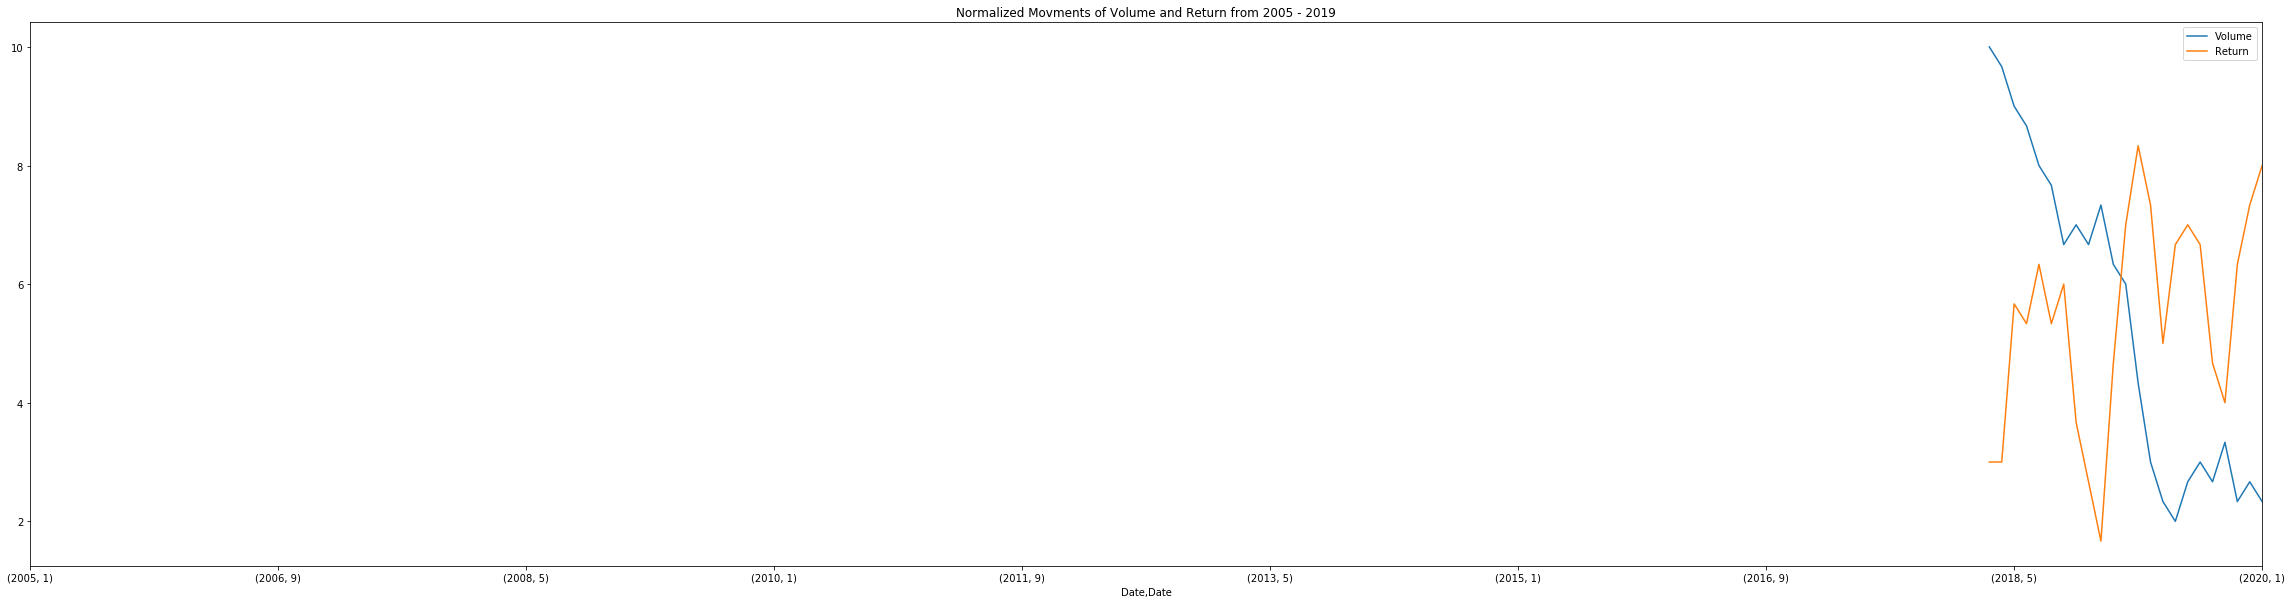

In [49]:
# Test normalize_correlate_and_plot function cell 
normalize_correlate_and_plot(datapull("BLOK"))

In [508]:
#Function to return volume graph
def volume_graph(df): 
    plot = df.groupby([df.index.year, df.index.month]).mean()["Volume"].plot(figsize=(20,10), title = "Volume Movement")
    return plot

In [51]:
spy_lables_p

Date  Date
2005  1        3
      2       11
      3        4
      4        3
      5       12
      6        6
      7       13
      8        5
      9        7
      10       3
      11      14
      12       5
2006  1       11
      2        7
      3        8
      4        8
      5        3
      6        6
      7        6
      8        9
      9       11
      10      11
      11       9
      12       8
2007  1        8
      2        3
      3        7
      4       14
      5       12
      6        4
              ..
2017  8        6
      9       10
      10      10
      11      11
      12       8
2018  1       14
      2        2
      3        3
      4        6
      5       11
      6        6
      7       12
      8       11
      9        7
      10       1
      11       9
      12       1
2019  1       15
      2       12
      3        9
      4       13
      5        1
      6       15
      7        8
      8        4
      9       10
      10      10
   

In [50]:
spy_lables_v = pd.qcut(v_spy.groupby([v_spy.index.year, v_spy.index.month]).mean()["Volume"], 15, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
spy_lables_p = pd.qcut(v_spy.groupby([v_spy.index.year, v_spy.index.month]).mean()["Return"], 15, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])


In [561]:
joined = pd.concat([spy_lables_v, spy_lables_p], axis=1)
#joined.reset_index(drop=True, inplace=True)


In [562]:
joined["Volume"] = pd.to_numeric(joined["Volume"])
joined["Return"] = pd.to_numeric(joined["Return"])


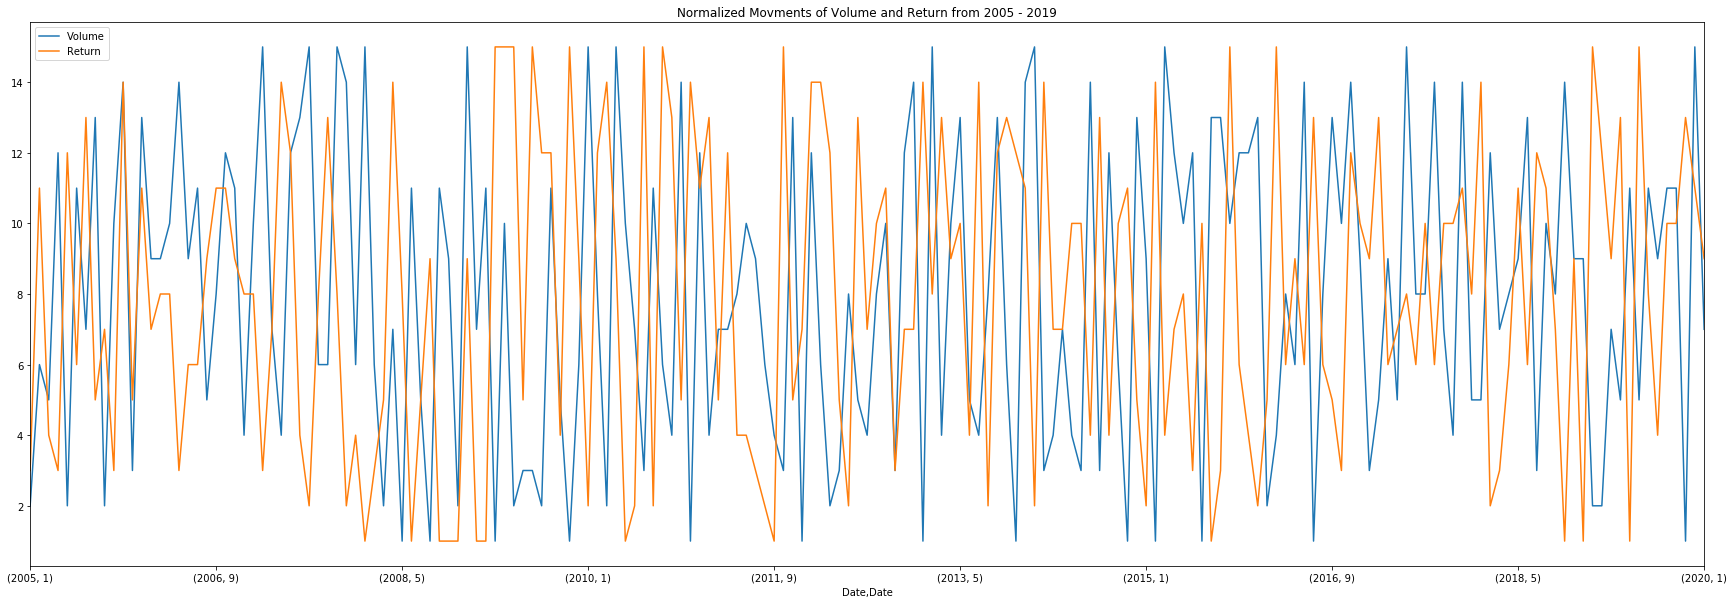

In [563]:
joined.plot(figsize=(30,10), title = "Normalized Movments of Volume and Return from 2005 - 2019")

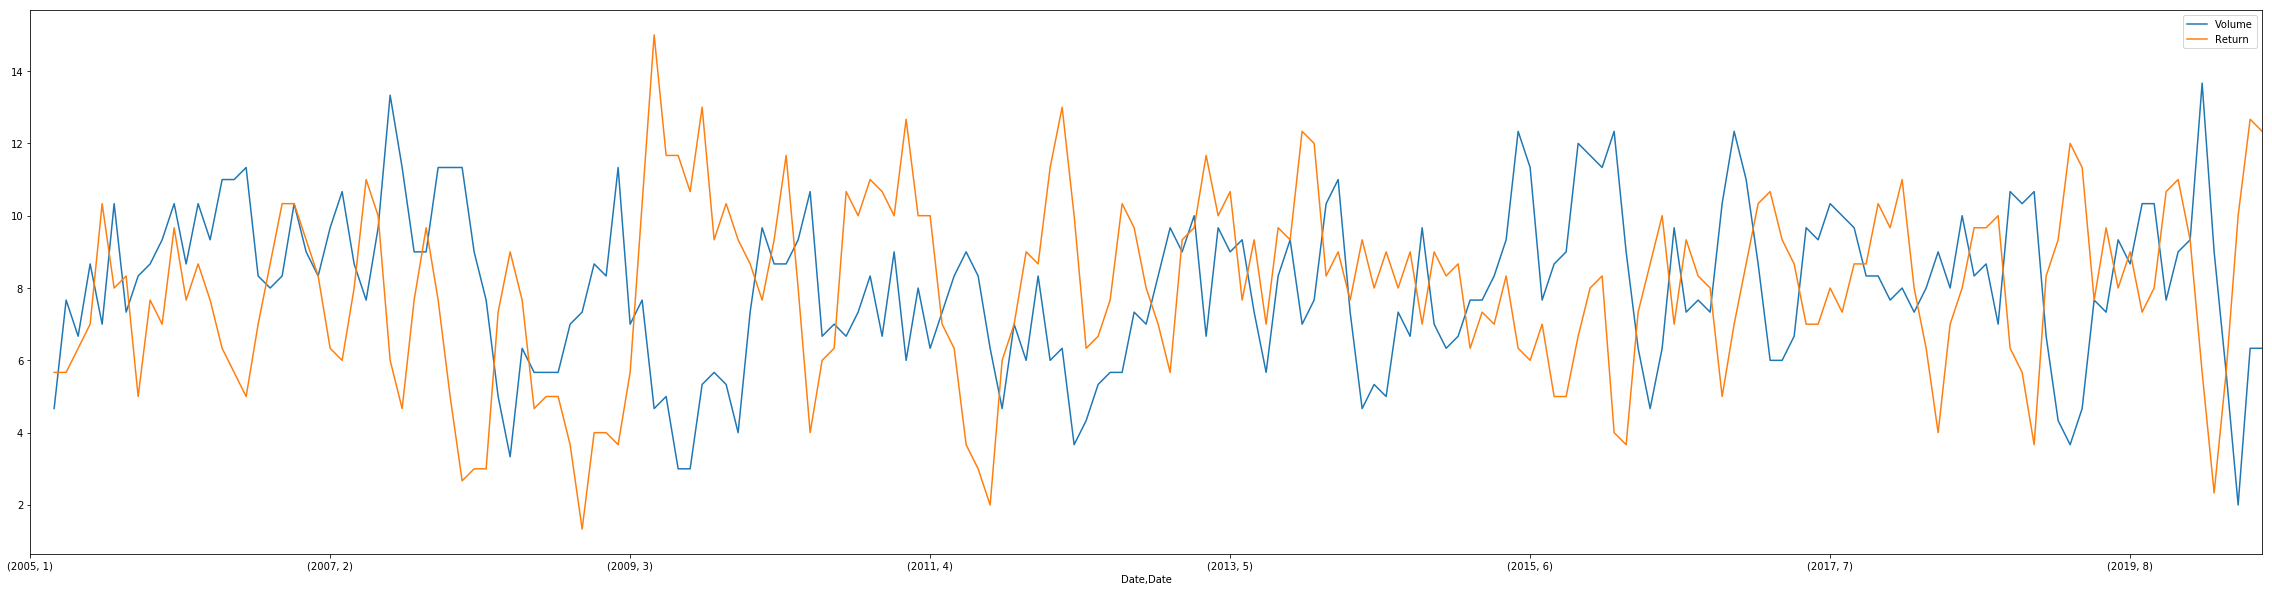

In [550]:
joined.rolling(window=3).mean().plot(figsize=(40,10))



In [564]:
corr = joined.corr()
corr

Volume    Return
Volume  1.000000 -0.396121
Return -0.396121  1.000000

In [555]:
joined.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

C:\Users\ASUS\Desktop\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ASUS\Desktop\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


          Volume    Return
Volume  1.000000 -0.059262
Return -0.059262  1.000000
         Volume   Return
Volume  1.00000 -0.14541
Return -0.14541  1.00000
          Volume    Return
Volume  1.000000 -0.191349
Return -0.191349  1.000000
          Volume    Return
Volume  1.000000  0.026812
Return  0.026812  1.000000
         Volume   Return
Volume  1.00000 -0.02695
Return -0.02695  1.00000
          Volume    Return
Volume  1.000000 -0.076895
Return -0.076895  1.000000
          Volume    Return
Volume  1.000000 -0.393228
Return -0.393228  1.000000
          Volume    Return
Volume  1.000000 -0.086279
Return -0.086279  1.000000
         Volume   Return
Volume  1.00000 -0.06369
Return -0.06369  1.00000
          Volume    Return
Volume  1.000000 -0.000843
Return -0.000843  1.000000
          Volume    Return
Volume  1.000000  0.109642
Return  0.109642  1.000000
          Volume    Return
Volume  1.000000 -0.080896
Return -0.080896  1.000000


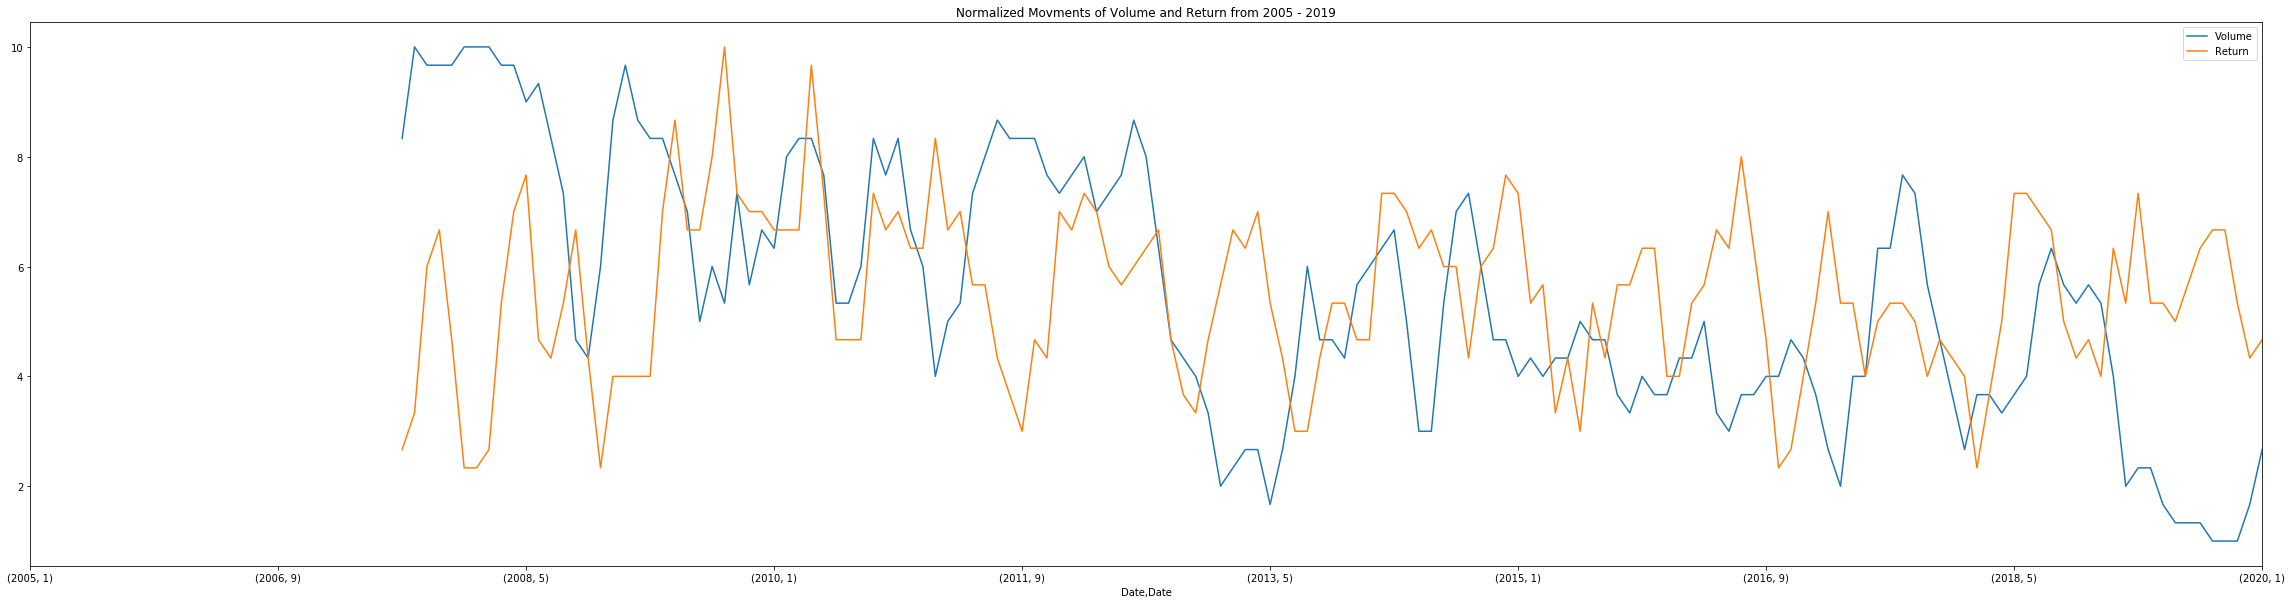

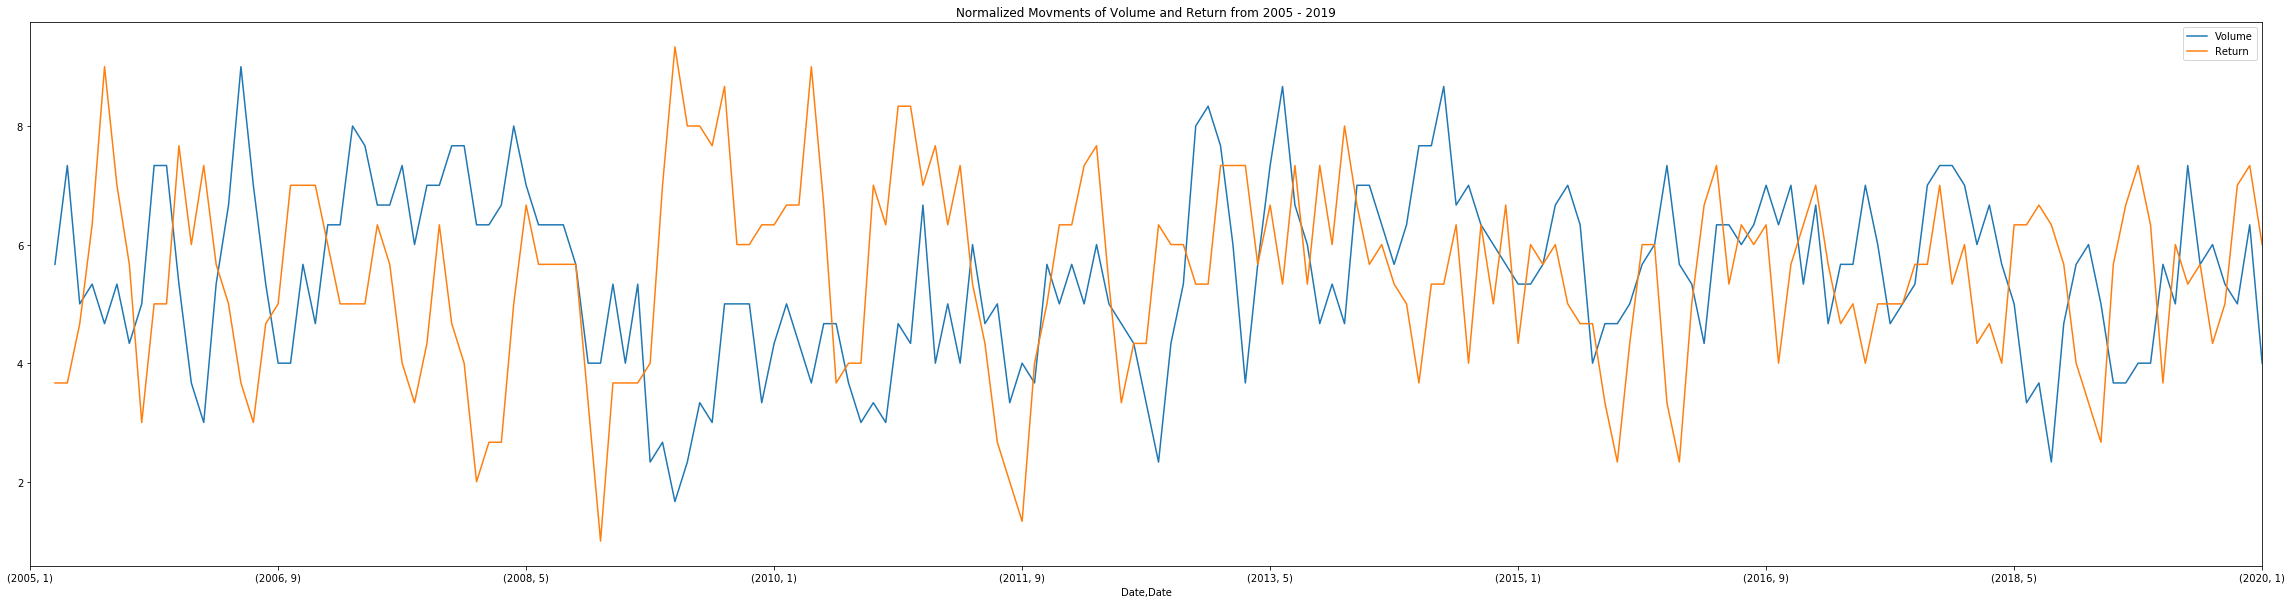

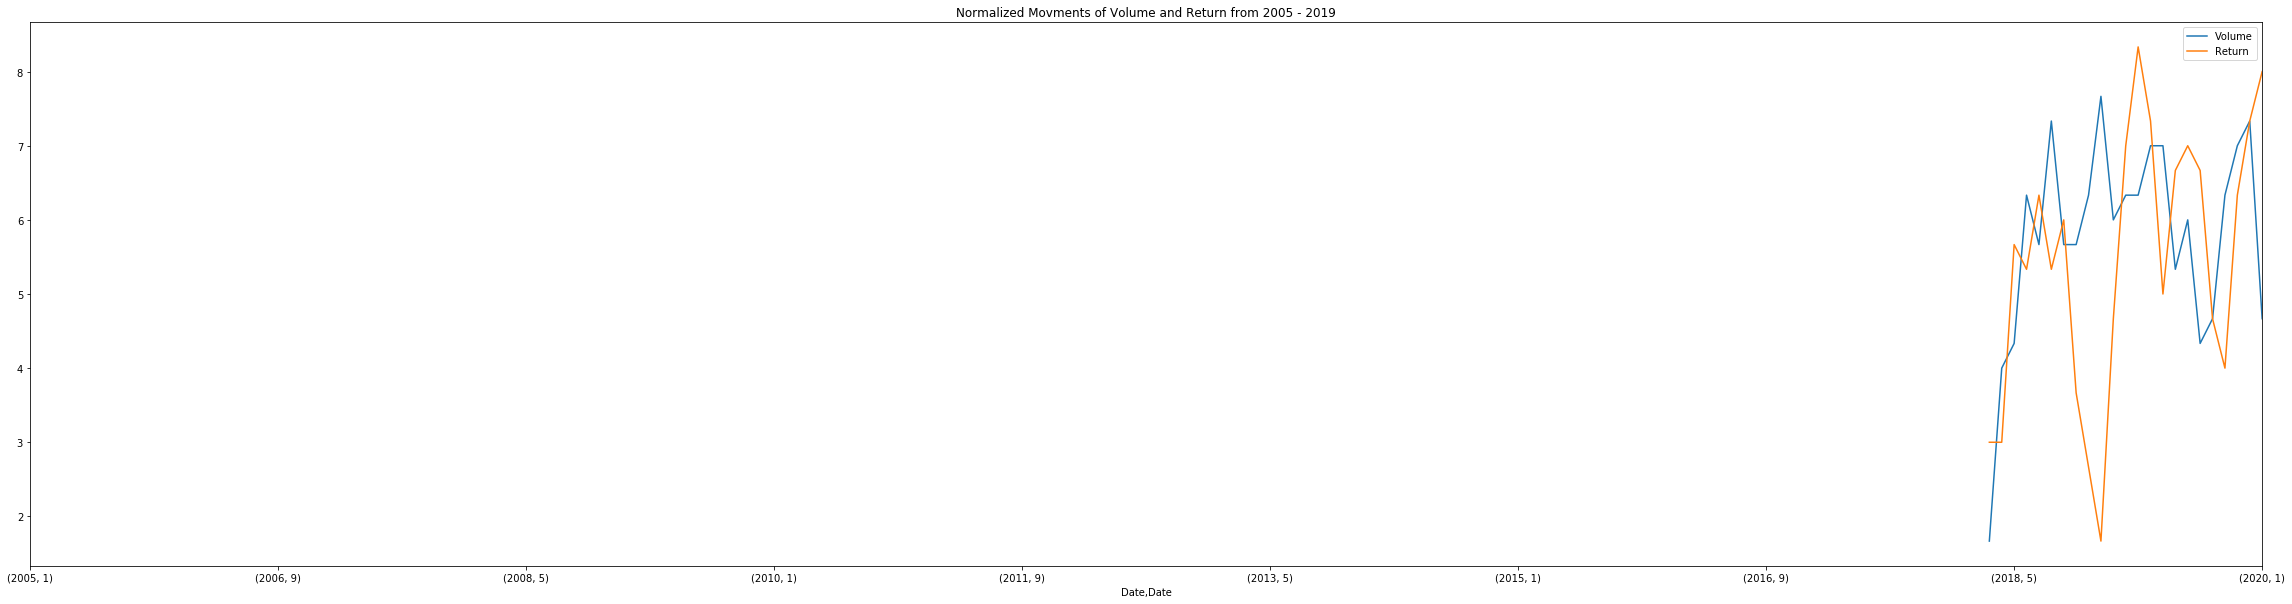

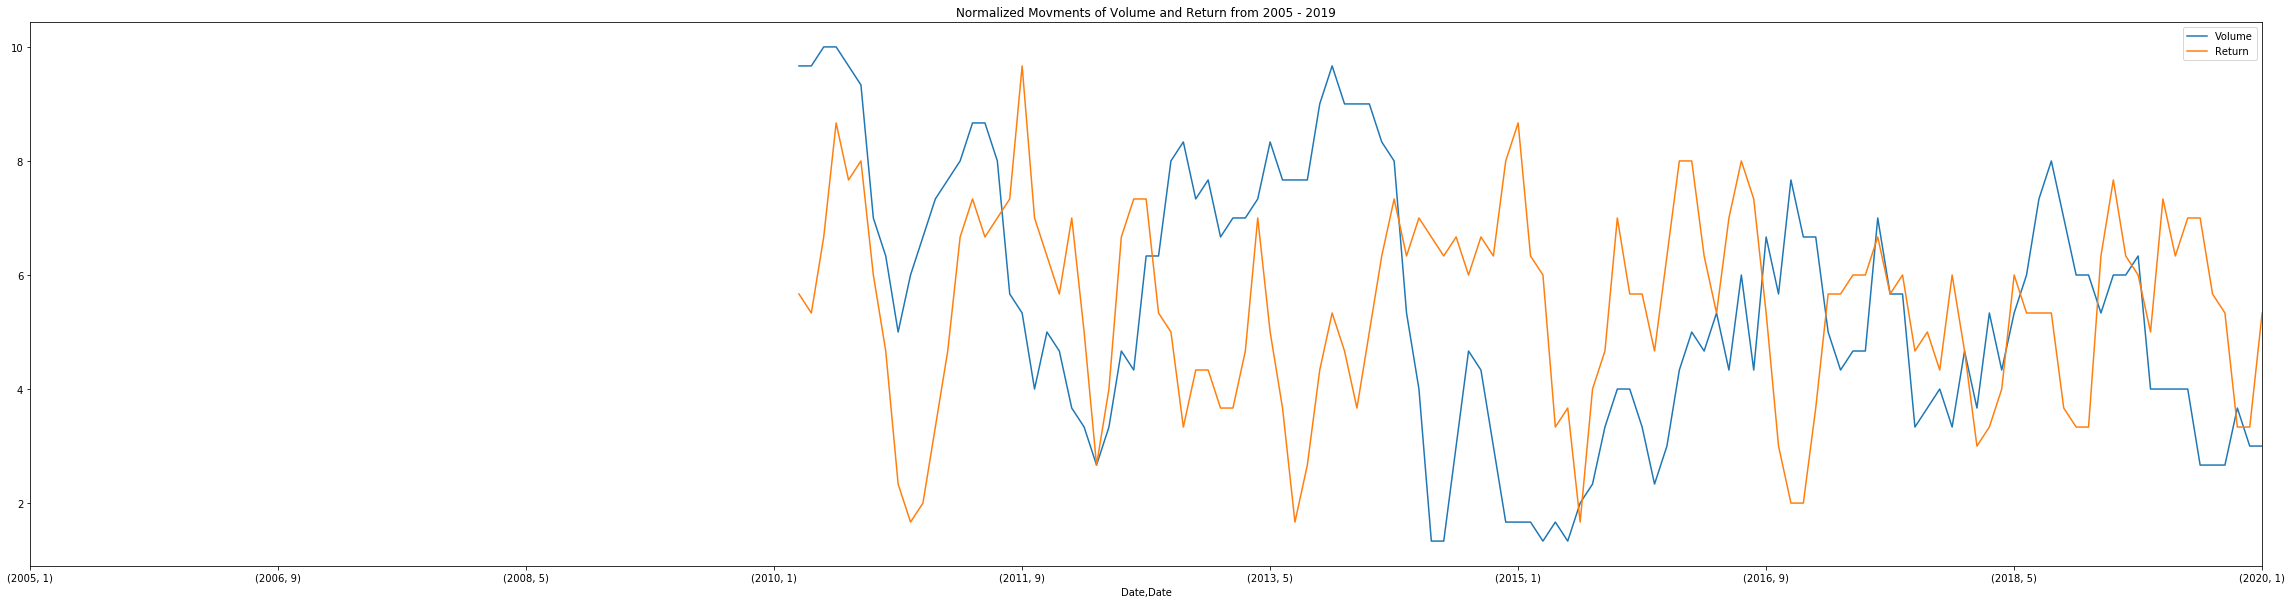

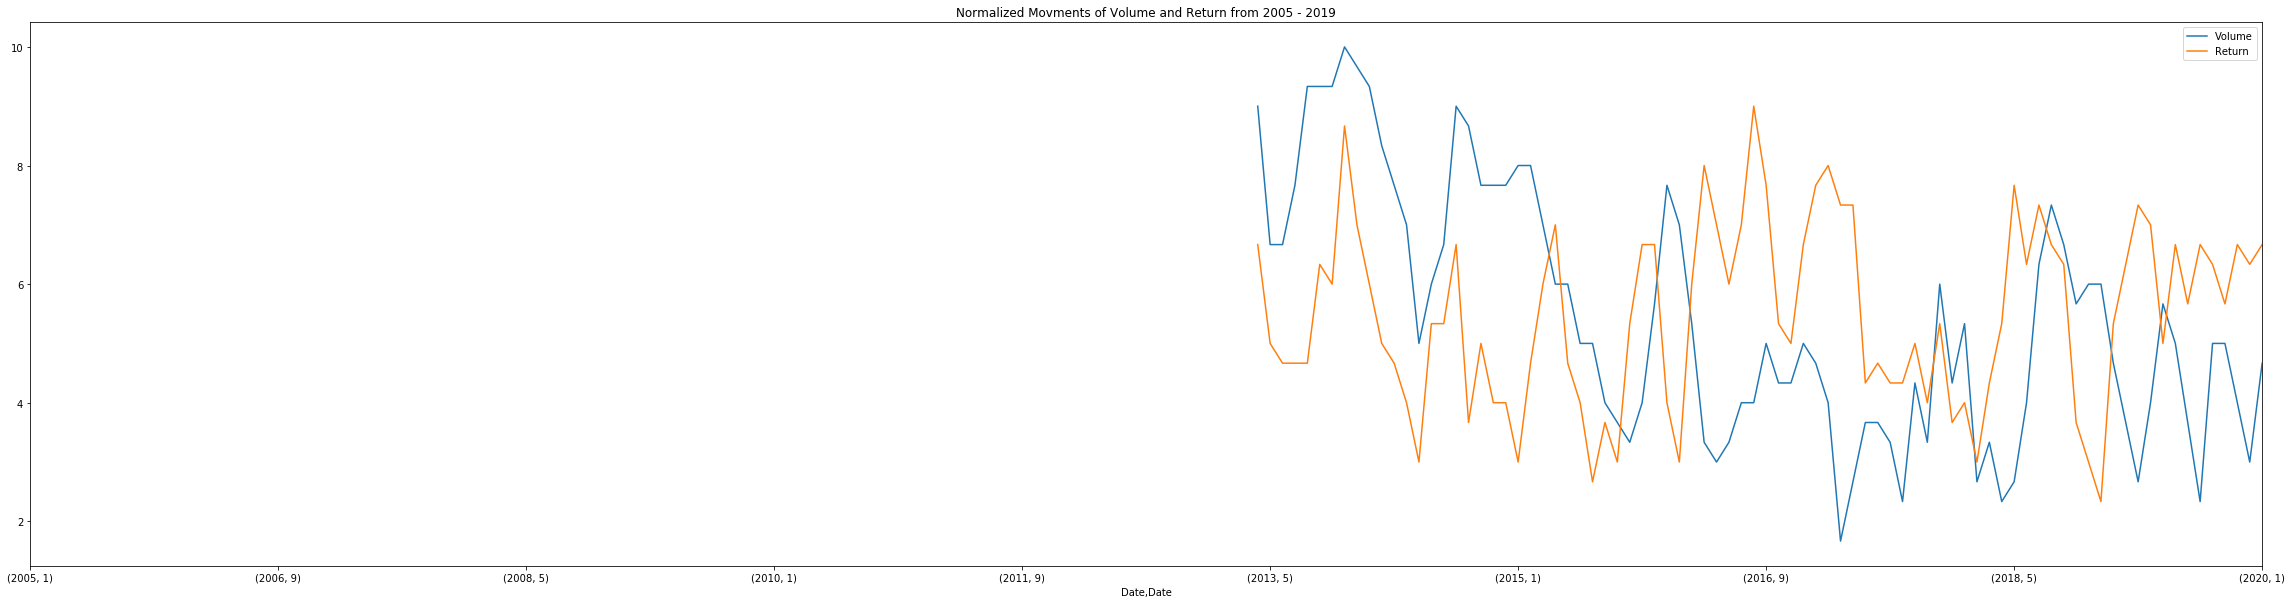

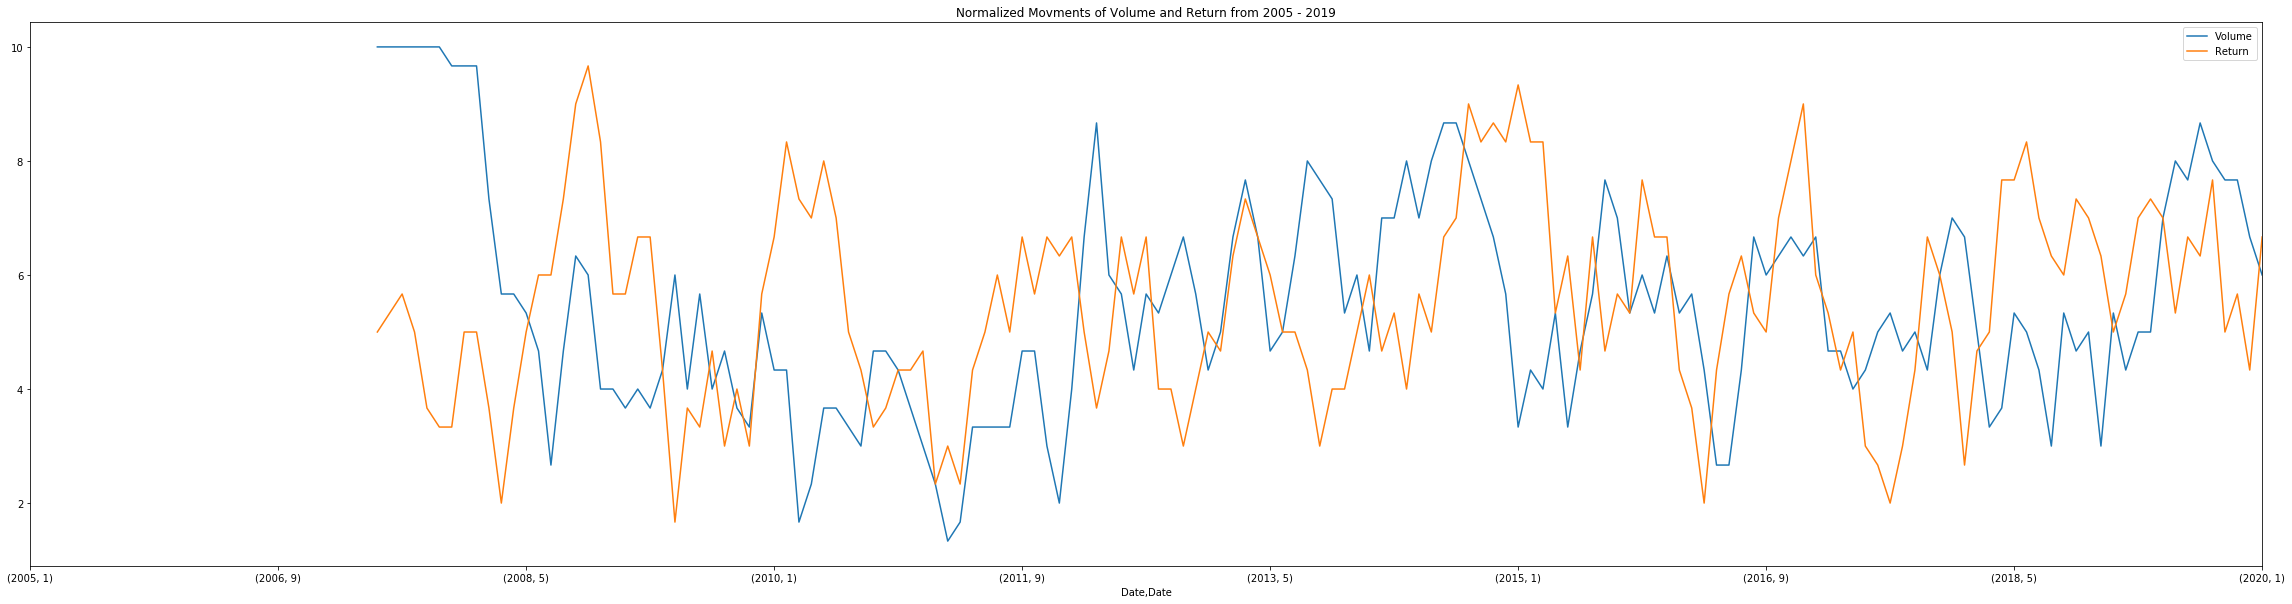

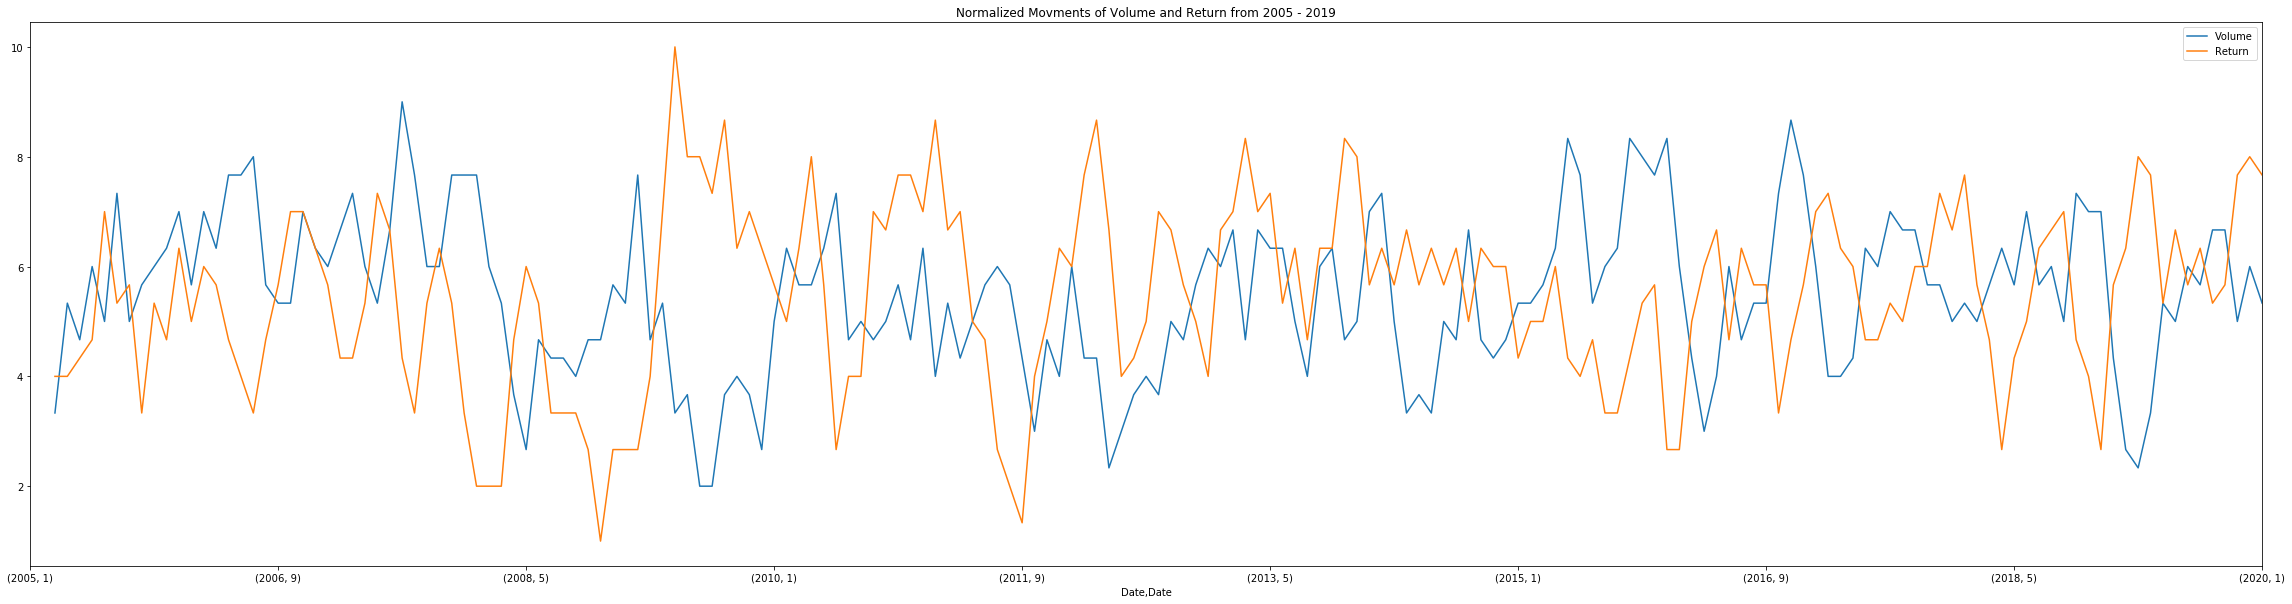

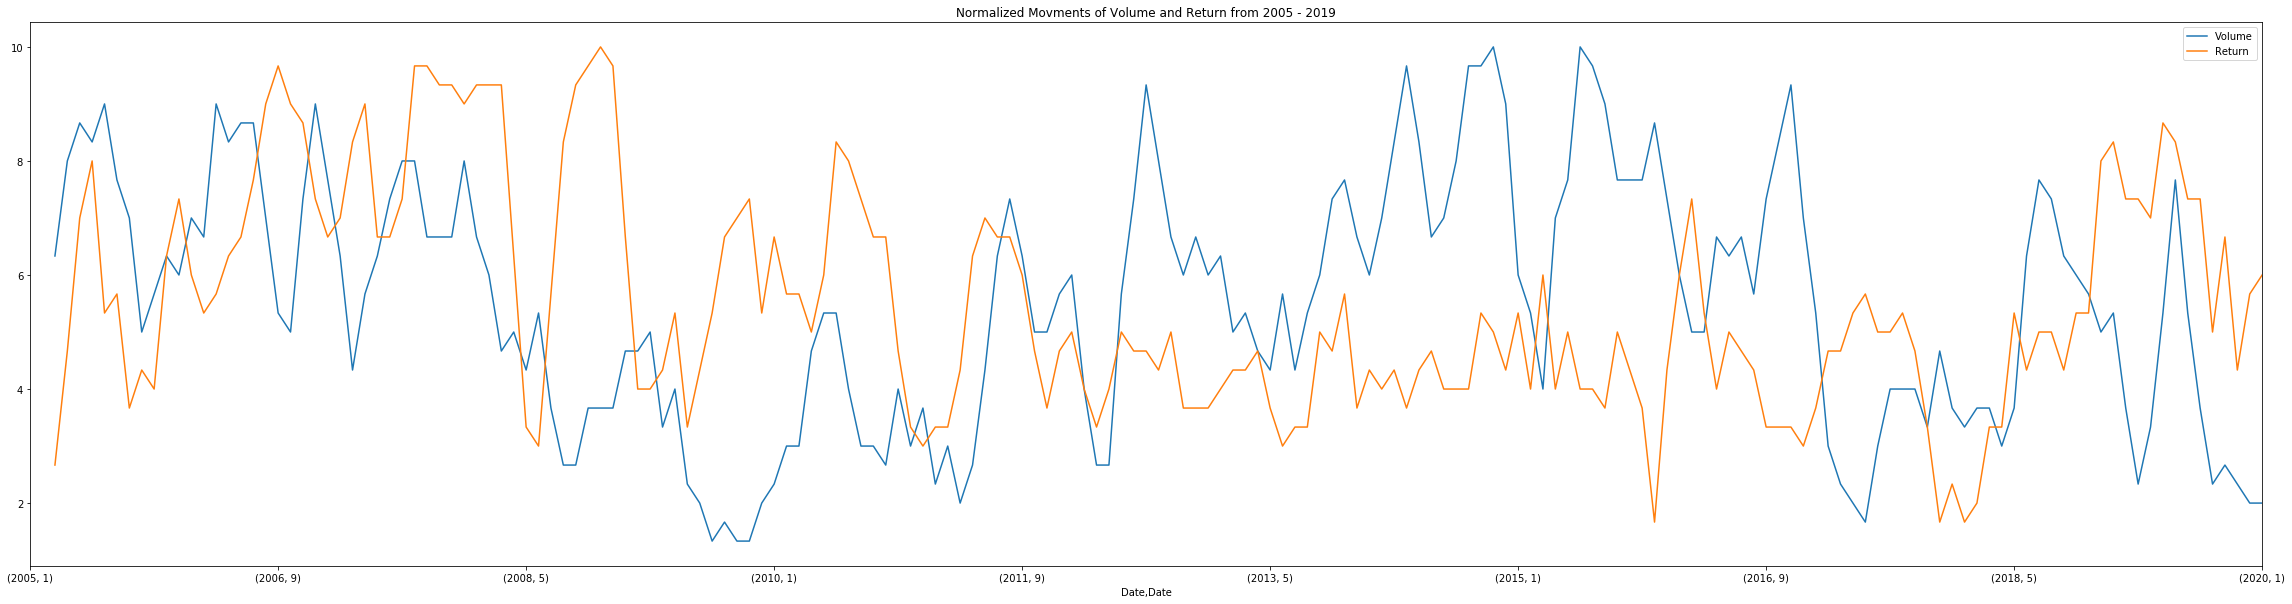

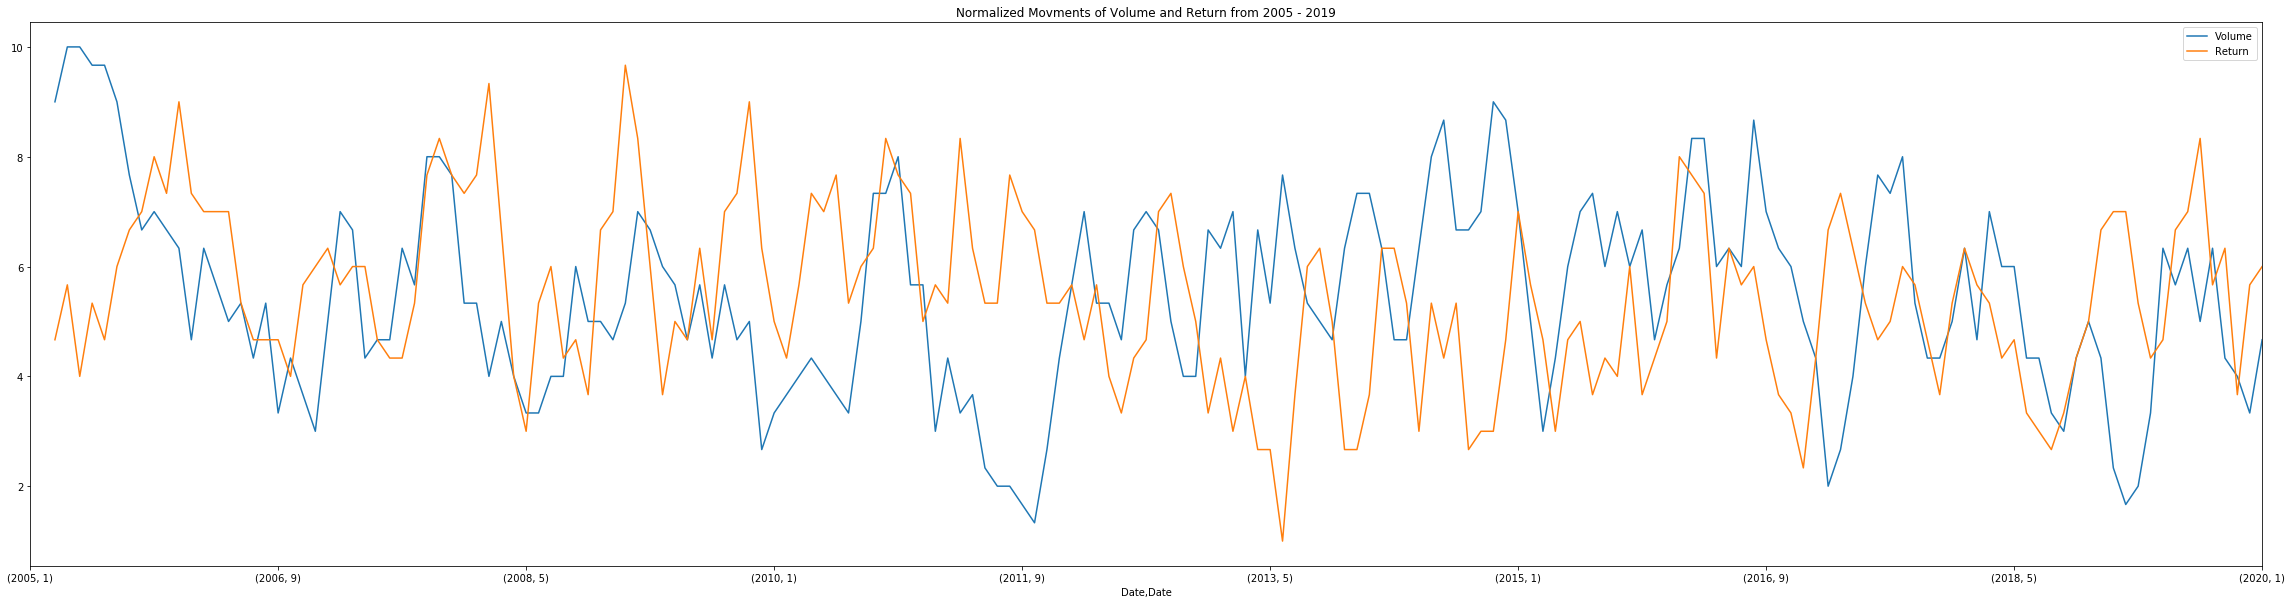

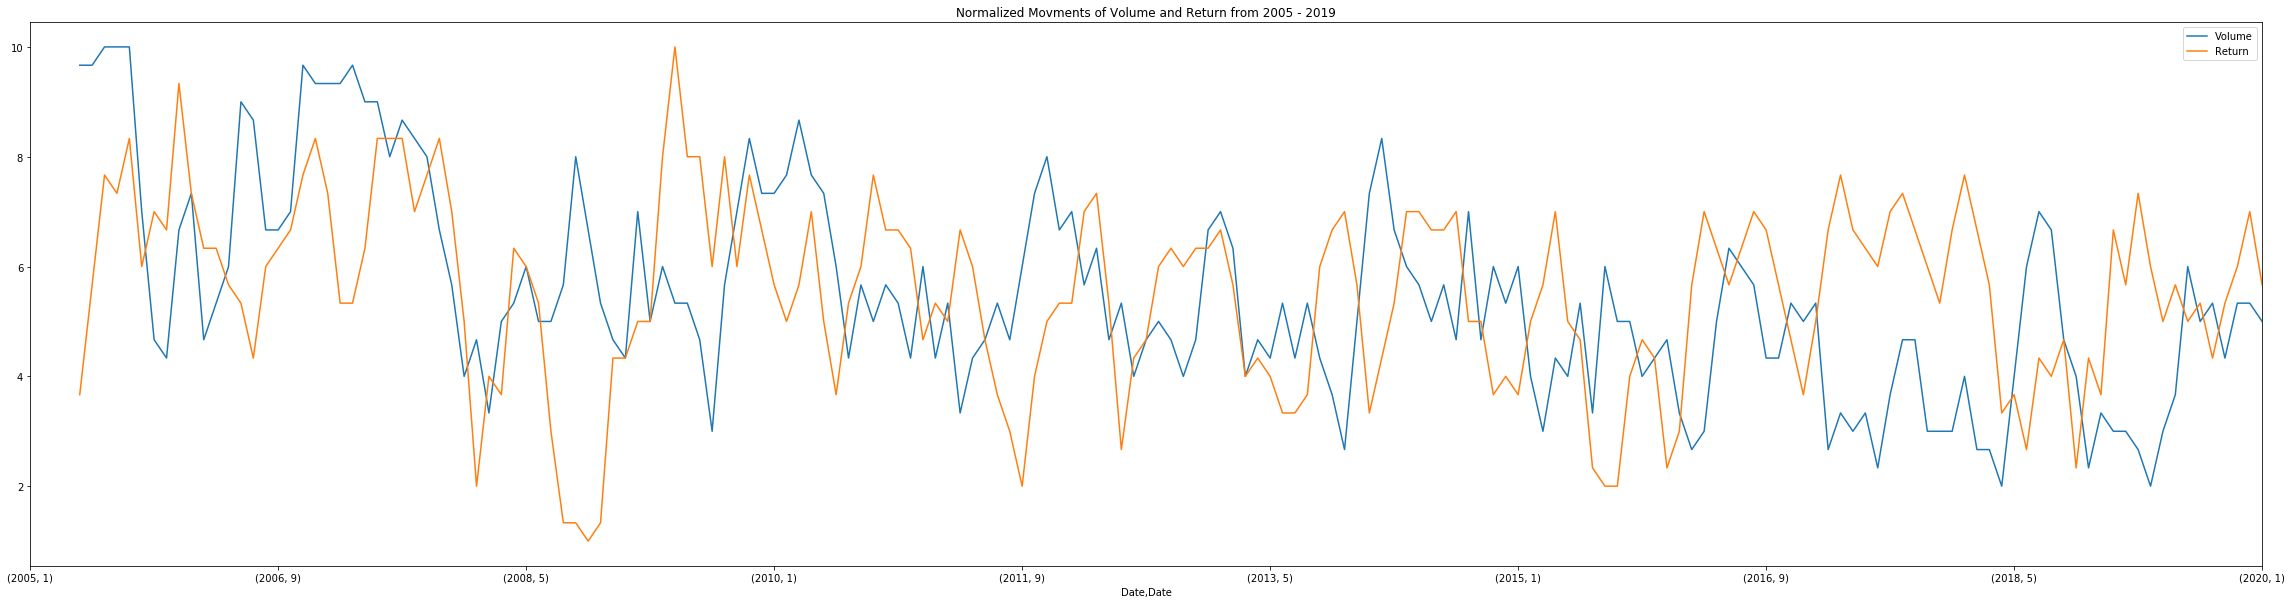

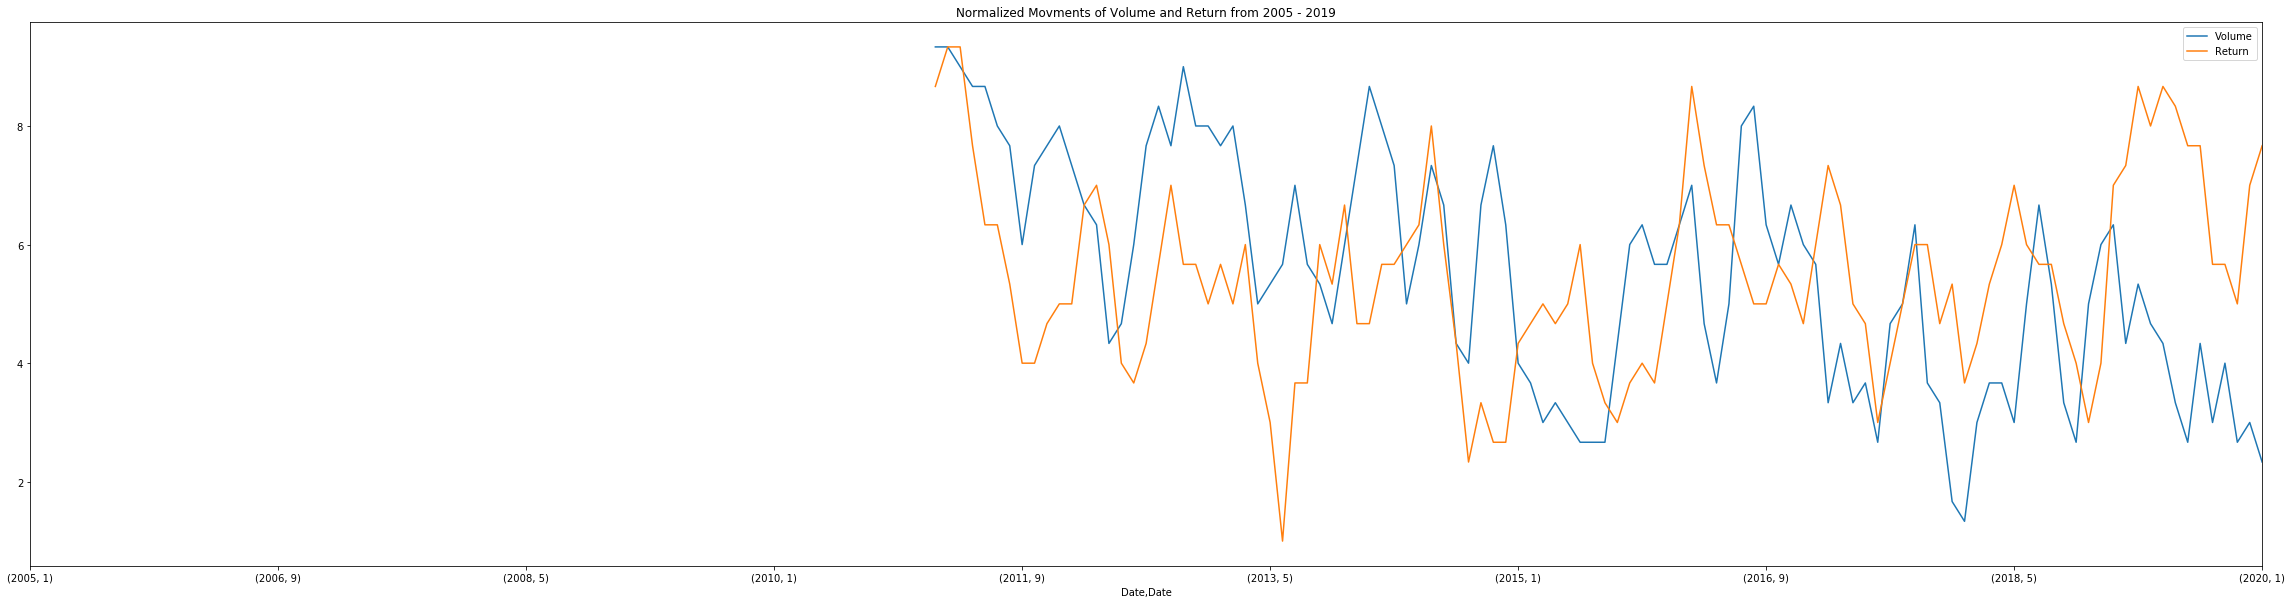

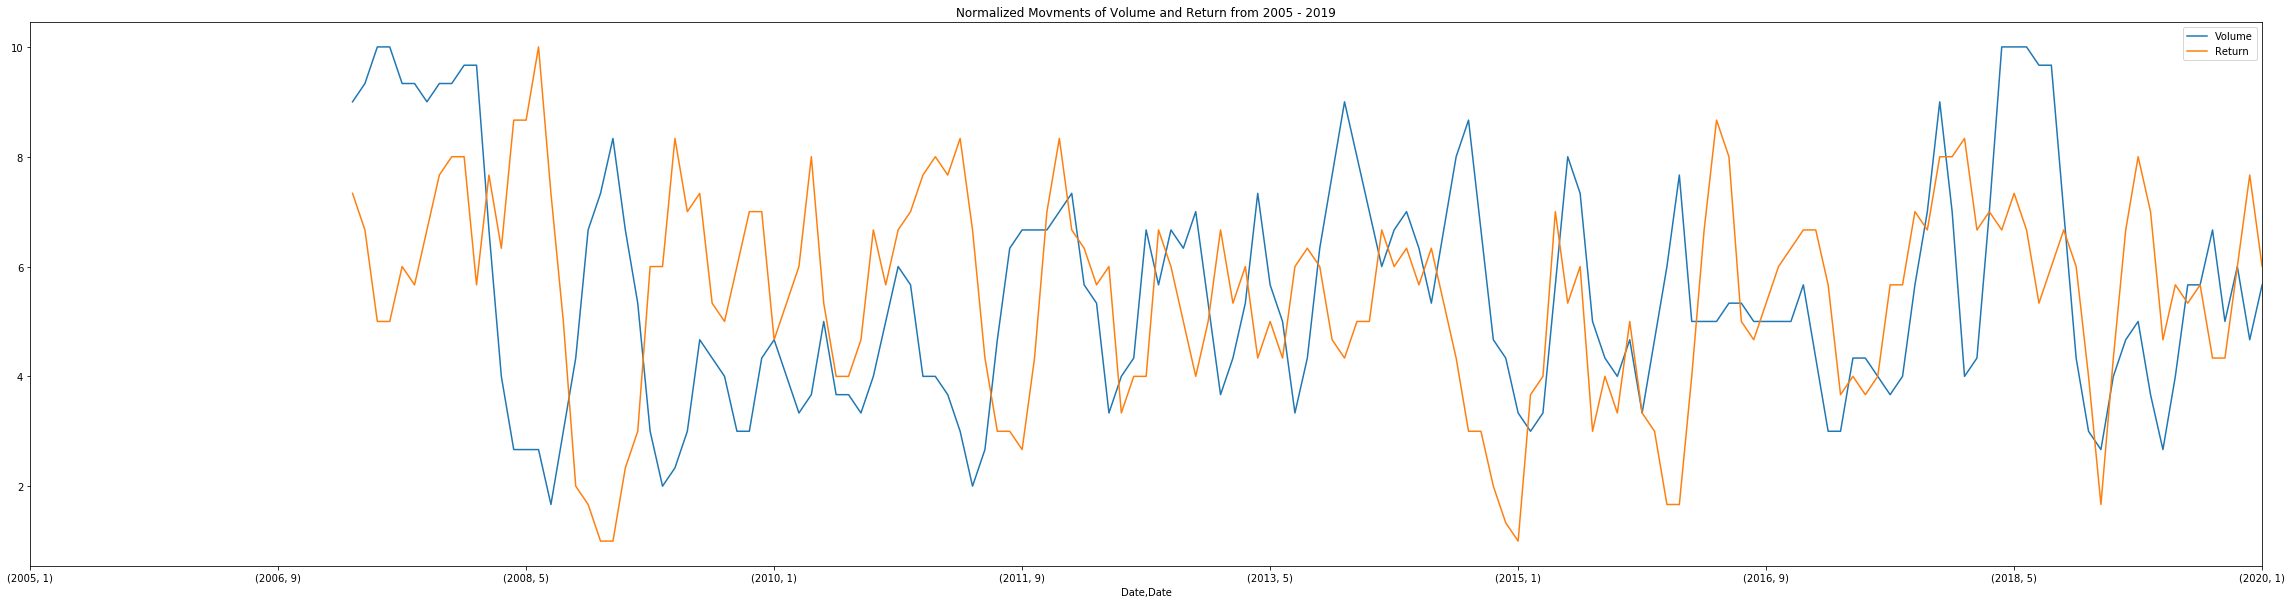

In [41]:
for col in set(dropped_level.columns):
    normalize_correlate_and_plot(datapull(col))

In [ ]:
s